In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from dense_feature_detector import DenseFeatureDetector

# データ読み込み

In [3]:
input_dir = "data/"

database1 = cv2.imread(input_dir + "IMG_0199.JPG", 0)
query1 = cv2.imread(input_dir + "IMG_0200.JPG", 0)

In [4]:
database = [database1]
query = [query1]

In [5]:
height, width = database[0].shape
database[0] = cv2.resize(database[0], ( int(width/4), int(height/4)))
query[0] = cv2.resize(query[0], (int(width/4), int(height/4)))

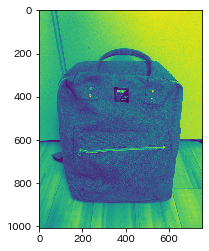

In [6]:
plt.imshow(database[0])

# descriptor作成

In [7]:
step = 15
scale = 15
start = 15

In [8]:
kp_query = []
des_query = []

kp_database = []
des_database = []

In [9]:
sift = cv2.xfeatures2d.SIFT_create()
detector = DenseFeatureDetector(sift, step, scale, start)

#query
kp, des = detector.detect(query[0])
kp_query.append(kp)
des_query.append(des)

#database
kp, des = detector.detect(database[0])
kp_database.append(kp)
des_database.append(des)

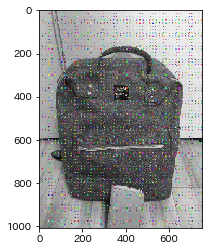

In [12]:
plt.imshow(cv2.drawKeypoints(query[0], kp_query[0], None))

In [17]:
patch_length = ((database[0].shape[0]-start)//step+1, (database[0].shape[1]-start)//step+1)

# descriptorのマッチング

In [14]:
bf = cv2.BFMatcher()
matches = bf.match(des_query[0], des_database[0])

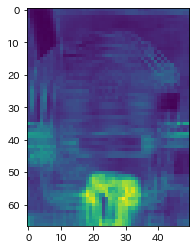

In [15]:
distance = np.array([m.distance for m in matches]).reshape(patch_length)
plt.imshow(distance)

(array([ 393., 1439.,  807.,  334.,  123.,   57.,   66.,   65.,   51.,
          15.]), array([ 19.3390789 ,  55.91737804,  92.49567719, 129.07397633,
        165.65227547, 202.23057461, 238.80887375, 275.38717289,
        311.96547203, 348.54377117, 385.12207031]), <a list of 10 Patch objects>)

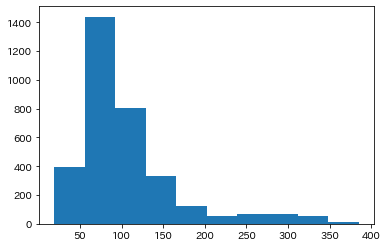

In [16]:
plt.hist(distance.reshape(-1))